# BindsNet Encoders

## Overview
All of the encoders below transform an N dimensional input tensor into an N + 1 dimensional tensor, where the added dimension is time. The data fed into the encoders must all be floating point values. This is because some of the encoders perform divisions using the data that could approximate to fractional values.

## Import Statements

In [17]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from time import time as t

from bindsnet.encoding import *

## Poisson Encoder

### Summary
Generates Poisson-distributed spike trains based on input intensity. 

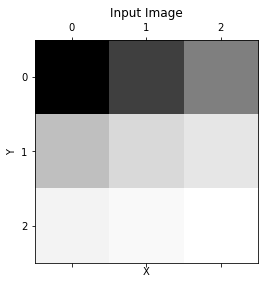

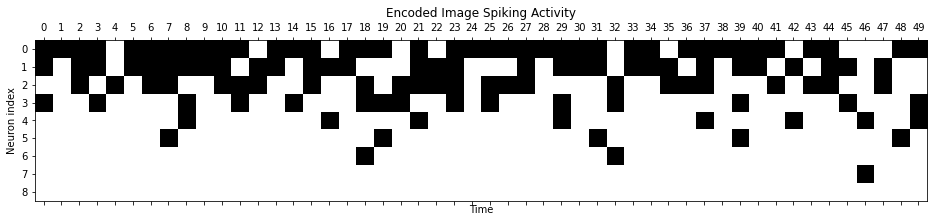

In [24]:
# time is the total sample duration in ms
time = 500

# dt is the step size within the sample duration in ms
dt = 10

# num_steps is how many steps are generated based on the time and dt values
num_steps = int(time/dt)

# input data
train_image = torch.FloatTensor([[100,75,50],[25,15,10],[5,2.5,0]])

# show input image
plt.matshow(train_image, cmap='binary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input Image')
plt.show()

# create encoder and encode input
encoder = PoissonEncoder(time=time, dt=dt)
encoded_image = encoder(train_image)

# Look at input spiking activity.
encoded_image = np.reshape(encoded_image,(num_steps,train_image.nelement())).T
plt.matshow(encoded_image, cmap='binary')
plt.xlabel('Time')
plt.ylabel('Neuron index')
plt.title('Encoded Image Spiking Activity')
plt.yticks(np.arange(train_image.nelement()))
plt.xticks(np.arange(num_steps))
plt.show()

## Bernoulli Encoder
### Summary
Generates Bernoulli-distributed spike trains based on input intensity. Inputs must be non-negative. Spikes correspond to successful Bernoulli trials, with success probability equal to (normalized in \[0, 1]) input value. A maximum probability can be set using the `max_prob` argument

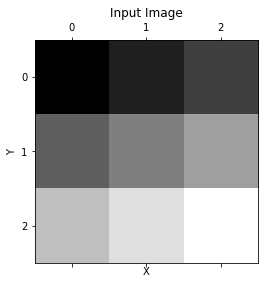

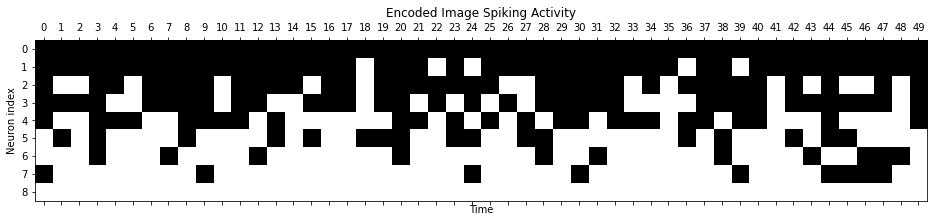

In [22]:
# time is the total sample duration in ms
time = 50

# dt is the step size within the sample duration in ms
dt = 1.0

# num_steps is how many steps are generated based on the time and dt values
num_steps = int(time/dt)

# input data
train_image = torch.FloatTensor([[80,70,60],[50,40,30],[20,10,0]])

# show input image
plt.matshow(train_image, cmap='binary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input Image')
plt.show()

# create encoder and encode input
encoder = BernoulliEncoder(time=time, dt=dt)
encoded_image = encoder(train_image)

# Look at input spiking activity.
encoded_image = np.reshape(encoded_image,(num_steps,train_image.nelement())).T
plt.matshow(encoded_image, cmap='binary')
plt.xlabel('Time')
plt.ylabel('Neuron index')
plt.title('Encoded Image Spiking Activity')
plt.yticks(np.arange(train_image.nelement()))
plt.xticks(np.arange(num_steps))
plt.show()

## Rank Order Encoder
### Summary
Encodes data via a rank order coding-like representation. One spike per neuron, temporally ordered by decreasing intensity. Inputs must be non-negative.

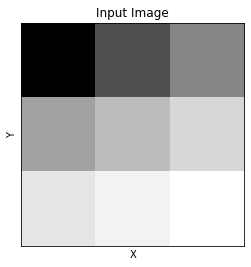

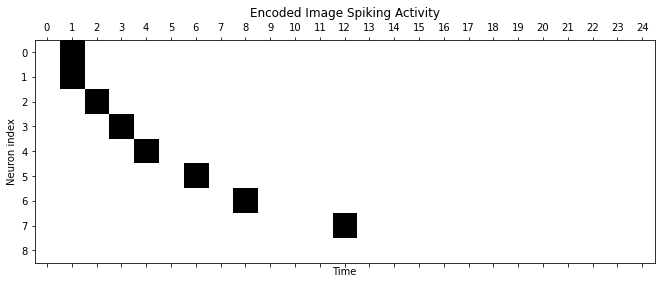

In [25]:
# time is the total sample duration in ms
time = 25

# dt is the step size within the sample duration in ms
dt = 1.0

# num_steps is how many steps are generated based on the time and dt values
num_steps = int(time/dt)

# input data
train_image = torch.FloatTensor([[100,70,50],[40,30,20],[15,10,5]])

# show input image
plt.matshow(train_image, cmap='binary')
plt.xticks(())
plt.yticks(())
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input Image')
plt.show()

# create encoder and encode input
encoder = RankOrderEncoder(time=time, dt=dt)
encoded_image = encoder(train_image.clone())

# Look at input spiking activity.
encoded_image = np.reshape(encoded_image,(num_steps,train_image.nelement())).T
plt.matshow(encoded_image, cmap='binary')
plt.xlabel('Time')
plt.ylabel('Neuron index')
plt.title('Encoded Image Spiking Activity')
plt.yticks(np.arange(train_image.nelement()))
plt.xticks(np.arange(num_steps))
plt.show()